In [88]:
import numpy as np
import pandas as pd
import visuals as vs

%matplotlib inline

data = pd.read_csv('bj_housing.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 7 columns):
Area      9999 non-null int64
Value     9999 non-null int64
Room      9999 non-null int64
Living    9999 non-null int64
School    9999 non-null int64
Year      9999 non-null int64
Floor     9999 non-null int64
dtypes: int64(7)
memory usage: 546.9 KB


,Area,Value,Room,Living,School,Year,Floor
0,128,370,3,1,1,2004,21
1,68,330,1,2,1,2000,6
2,125,355,3,2,0,2003,5
3,129,278,2,2,0,2005,16
4,118,340,3,2,0,2003,6


In [76]:
prices = data['Value']
features = data.drop('Value', axis = 1)

In [89]:
import sklearn.model_selection as ms

X_train, X_test, y_train, y_test = ms.train_test_split(features, prices, test_size=0.2, train_size = 0.8, random_state=0)


In [90]:
import sklearn.metrics as mtcs

def performance_metric(y_true, y_predict):
    return mtcs.r2_score(y_true, y_predict)

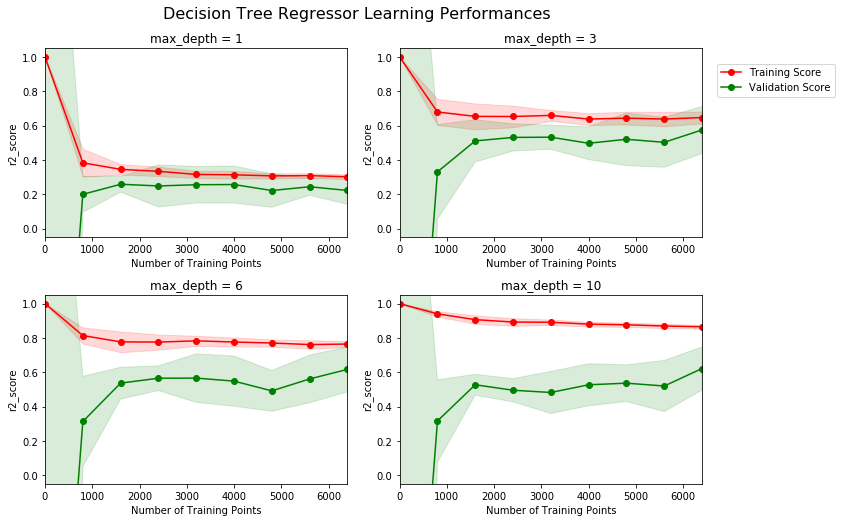

In [51]:
vs.ModelLearning(X_train, y_train)

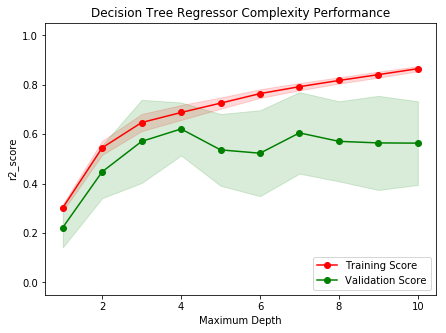

In [52]:
vs.ModelComplexity(X_train, y_train)

In [91]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    cross_validator = KFold(10, shuffle=True)
    regressor = DecisionTreeRegressor()
    
    depth = [i + 1 for i in range(30)]
#    print(depth)
    params = {'max_depth':depth}
    
    scoring_fnc = make_scorer(performance_metric)
    
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cross_validator)
    
    grid = grid.fit(X, y)
    
    return grid.best_estimator_

In [94]:
optimal_reg = fit_model(X_train, y_train)

print "Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth'])

Parameter 'max_depth' is 10 for the optimal model.


In [95]:
all_predicted_price = optimal_reg.predict(X_test)
r2 = performance_metric(y_test, all_predicted_price)
print "Optimal model has R^2 score {:,.2f} on test data".format(r2)

Optimal model has R^2 score 0.52 on test data
